## CASE STUDY ASSIGNMENT 7 - Final Case Classifier

#### Team: Nicole Wittlin, Joe Schueder, Steven Hayden and Kevin Mendonsa

# Introduction

Classify the Column Labeled ‘y’
Features are labeled x0 through x49
Deliverable:
Minimize my dollar cost on an UNKNOWN dataset
 * Each False Positive costs 10 Dollars 
 * Each False Negative costs 500 Dollars 
 * True Positives and True Negatives cost 0 Dollars 


Paper Framework

Introduction
EDA
    High Cardinality
    Correlation
    Missing Data
    Data classes
    Outliers
    Normality
    
 Assumptions before cleaning etc.
 
 Data Cleanup - Renaming values, reclassifying continuous to categorical, imputation or drop out
 
 Data Prep for Modeling:
 STandardization - MinMax scaling
 One-hot Encoding
 Sampling strategy
 
 Baseline Model
 
 Feature Importance
 
 Recursive feature extraction (Dimensionality Reduction - Occams's Razor)
 
 Cross Validation
 
 Parameter Tuning
 
 Multiple models - Diversity (models selected and why)
 
 Ensembling
 
 Error Metrics - ROC-AUC, F1 etc.
 
 Confusion Matrices
 
 Cost/Benefits Matrix - Tranlate into business terms/discovery

Paper Framework
·        Introduction
·        EDA
o   High Cardinality
o   Correlation
o   Missing Data classes
o   Outliers
o   Normality
·        Assumptions before cleaning etc.
·        Data Cleanup –
o   Renaming values,
o   Reclassifying continuous to categorical,
o   Imputation or drop out
·        Data Prep for Modeling:
o   Standardization - MinMax scaling
o   One-hot Encoding
o   Sampling strategy
·        Baseline Model
·        Feature Importance
·        Recursive feature extraction (Dimensionality Reduction - Occams's Razor)
·        Cross Validation
·        Parameter Tuning
·        Multiple models - Diversity (models selected and why)
·        Ensembling
·        Error Metrics - ROC-AUC, F1 etc.
·        Confusion Matrices
·        Cost/Benefits Matrix - Translate into business terms/discovery
 

# Preprocessing

Importing the data from a CSV file provided using Pandas. Followed by some basic data exploration to determine number of rows, columns and data types. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df = pd.read_csv('final_project.csv')
df = pd.read_csv(r'C:\Users\jjschued\Documents\SMU\7333 QTW\final_project.csv')

In [4]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [5]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [4]:
df['x24']

0          euorpe
1            asia
2            asia
3            asia
4            asia
5            asia
6            asia
7            asia
8            asia
9            asia
10           asia
11        america
12           asia
13           asia
14           asia
15           asia
16           asia
17           asia
18           asia
19           asia
20           asia
21           asia
22           asia
23           asia
24         euorpe
25           asia
26           asia
27           asia
28         euorpe
29           asia
           ...   
159970       asia
159971       asia
159972       asia
159973       asia
159974       asia
159975       asia
159976       asia
159977       asia
159978       asia
159979       asia
159980     euorpe
159981       asia
159982       asia
159983       asia
159984     euorpe
159985       asia
159986       asia
159987    america
159988       asia
159989       asia
159990       asia
159991       asia
159992    america
159993     euorpe
159994    

In [5]:
# Clean-up classes for consistency
df['x24'] = df['x24'].replace(['asia', 'euorpe','america'], ['Asia', 'Europe','America'])
df['x29'] = df['x29'].replace(['sept.', 'January','Dev','July'], ['Sept', 'Jan','Dec','Jul'])
df['x30'] = df['x30'].replace(['monday', 'tuesday','wednesday','thursday','friday'], ['mon', 'tue','wed','thu','fri'])

In [6]:
df.x24.value_counts()

Asia       138965
Europe      16538
America      4469
Name: x24, dtype: int64

In [7]:
df['x29']

0          Jul
1          Aug
2          Jul
3          Jul
4          Jul
5          Aug
6          Jun
7          Aug
8          May
9          Jun
10         Jul
11         Jul
12         Aug
13         May
14         Jun
15        Sept
16        Sept
17         Jun
18         Jun
19         May
20         May
21         Aug
22         Jul
23         Jul
24         Jun
25         Jul
26         Aug
27        Sept
28         Jun
29         Jun
          ... 
159970     Apr
159971     Jun
159972     Aug
159973     Jul
159974     Aug
159975     Jun
159976     Jun
159977     Jun
159978     Jul
159979     Jun
159980     Jul
159981     Aug
159982     Jul
159983     May
159984     Jun
159985     Jun
159986     May
159987     Aug
159988     Aug
159989     May
159990     Mar
159991     Jul
159992     Jun
159993     Jun
159994     Jun
159995     Aug
159996     May
159997     Jun
159998     May
159999     Aug
Name: x29, Length: 160000, dtype: object

In [8]:
df.x29.value_counts()

Jul     45569
Jun     41329
Aug     29406
May     21939
Sept    10819
Apr      6761
Oct      2407
Mar      1231
Nov       337
Feb       140
Dec        23
Jan         9
Name: x29, dtype: int64

In [9]:
df['x30']

0             tue
1             wed
2             wed
3             wed
4             tue
5             wed
6             wed
7             wed
8             wed
9             wed
10            wed
11            tue
12        thurday
13            tue
14        thurday
15            wed
16            wed
17        thurday
18            wed
19            tue
20            tue
21            wed
22        thurday
23            wed
24            wed
25            wed
26        thurday
27            wed
28            wed
29            tue
           ...   
159970        wed
159971        tue
159972    thurday
159973        tue
159974        wed
159975        wed
159976    thurday
159977        wed
159978        wed
159979        wed
159980    thurday
159981        tue
159982        tue
159983        wed
159984    thurday
159985        wed
159986    thurday
159987        wed
159988        wed
159989        wed
159990        wed
159991    thurday
159992        wed
159993        wed
159994    

In [10]:
df.x30.value_counts()

wed        101535
thurday     29429
tue         27954
fri           564
mon           488
Name: x30, dtype: int64

In [11]:
df['x32']

0           0.0%
1         -0.02%
2         -0.01%
3          0.01%
4          0.01%
5         -0.01%
6         -0.01%
7          0.01%
8         -0.03%
9          0.01%
10         0.01%
11         0.02%
12         0.01%
13        -0.01%
14         -0.0%
15        -0.01%
16        -0.01%
17         -0.0%
18          0.0%
19         -0.0%
20        -0.02%
21        -0.01%
22         0.01%
23         -0.0%
24          0.0%
25         0.02%
26         0.01%
27         0.01%
28        -0.02%
29         0.01%
           ...  
159970    -0.01%
159971    -0.01%
159972     0.02%
159973     0.01%
159974     0.02%
159975    -0.01%
159976      0.0%
159977     0.02%
159978     0.01%
159979     -0.0%
159980    -0.01%
159981     -0.0%
159982    -0.02%
159983     -0.0%
159984    -0.01%
159985      0.0%
159986     0.01%
159987     0.01%
159988    -0.01%
159989    -0.01%
159990      0.0%
159991     0.01%
159992     -0.0%
159993    -0.01%
159994    -0.02%
159995      0.0%
159996    -0.01%
159997     -0.

In [12]:
df['x32'] = df['x32'].str.rstrip('%').astype('float') / 100.0

In [14]:
df['x32']

0         0.0000
1        -0.0002
2        -0.0001
3         0.0001
4         0.0001
5        -0.0001
6        -0.0001
7         0.0001
8        -0.0003
9         0.0001
10        0.0001
11        0.0002
12        0.0001
13       -0.0001
14       -0.0000
15       -0.0001
16       -0.0001
17       -0.0000
18        0.0000
19       -0.0000
20       -0.0002
21       -0.0001
22        0.0001
23       -0.0000
24        0.0000
25        0.0002
26        0.0001
27        0.0001
28       -0.0002
29        0.0001
           ...  
159970   -0.0001
159971   -0.0001
159972    0.0002
159973    0.0001
159974    0.0002
159975   -0.0001
159976    0.0000
159977    0.0002
159978    0.0001
159979   -0.0000
159980   -0.0001
159981   -0.0000
159982   -0.0002
159983   -0.0000
159984   -0.0001
159985    0.0000
159986    0.0001
159987    0.0001
159988   -0.0001
159989   -0.0001
159990    0.0000
159991    0.0001
159992   -0.0000
159993   -0.0001
159994   -0.0002
159995    0.0000
159996   -0.0001
159997   -0.00

In [15]:
df['x37']

0          $1313.96
1          $1962.78
2           $430.47
3         $-2366.29
4          $-620.66
5          $-196.45
6          $-241.04
7           $621.35
8          $-301.89
9          $-484.09
10         $-106.65
11         $-622.76
12          $545.55
13         $1019.08
14          $960.95
15          $299.52
16           $72.83
17          $-12.09
18         $1074.27
19         $-426.46
20         $-710.18
21          $370.01
22        $-1199.52
23          $-12.09
24         $2158.38
25          $-464.6
26         $-526.08
27        $-1321.42
28          $771.15
29           $41.97
            ...    
159970      $954.38
159971      $621.19
159972     $1032.85
159973      $729.11
159974      $-167.1
159975      $-33.14
159976     $-409.63
159977     $-126.15
159978      $191.61
159979    $-1356.91
159980      $599.35
159981     $-613.38
159982     $2251.59
159983       $-5.87
159984       $198.3
159985    $-1788.89
159986     $-118.39
159987       $15.62
159988      $134.18


In [16]:
df['x37'] = df['x37'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [17]:
df['x37']

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
5         -196.45
6         -241.04
7          621.35
8         -301.89
9         -484.09
10        -106.65
11        -622.76
12         545.55
13        1019.08
14         960.95
15         299.52
16          72.83
17         -12.09
18        1074.27
19        -426.46
20        -710.18
21         370.01
22       -1199.52
23         -12.09
24        2158.38
25        -464.60
26        -526.08
27       -1321.42
28         771.15
29          41.97
           ...   
159970     954.38
159971     621.19
159972    1032.85
159973     729.11
159974    -167.10
159975     -33.14
159976    -409.63
159977    -126.15
159978     191.61
159979   -1356.91
159980     599.35
159981    -613.38
159982    2251.59
159983      -5.87
159984     198.30
159985   -1788.89
159986    -118.39
159987      15.62
159988     134.18
159989    -677.95
159990   -1012.45
159991   -1720.76
159992   -1177.33
159993    -818.32
159994    

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

# Exploratory Data Analysis
The team was given dataset of 150,000 rows and 51 columns. 

In [19]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


## Missing Data

## % of 1 in y
Since 158392 160000

In [20]:
# Missing Data Summary
df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [22]:
# Drop all rows containing NaN values from the data frame

drop_nan_df = df.dropna()
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
x0     158392 non-null float64
x1     158392 non-null float64
x2     158392 non-null float64
x3     158392 non-null float64
x4     158392 non-null float64
x5     158392 non-null float64
x6     158392 non-null float64
x7     158392 non-null float64
x8     158392 non-null float64
x9     158392 non-null float64
x10    158392 non-null float64
x11    158392 non-null float64
x12    158392 non-null float64
x13    158392 non-null float64
x14    158392 non-null float64
x15    158392 non-null float64
x16    158392 non-null float64
x17    158392 non-null float64
x18    158392 non-null float64
x19    158392 non-null float64
x20    158392 non-null float64
x21    158392 non-null float64
x22    158392 non-null float64
x23    158392 non-null float64
x24    158392 non-null object
x25    158392 non-null float64
x26    158392 non-null float64
x27    158392 non-null float64
x28    158392 non-null

In [24]:
drop_nan_df.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [25]:
drop_nan_df.info

<bound method DataFrame.info of               x0         x1         x2         x3         x4         x5  \
0      -0.166563  -3.961588   4.621113   2.481908  -1.800135   0.804684   
1      -0.149894  -0.585676  27.839856   4.152333   6.426802  -2.426943   
2      -0.321707  -1.429819  12.251561   6.586874  -5.304647 -11.311090   
3      -0.245594   5.076677 -24.149632   3.637307   6.505811   2.290224   
4      -0.273366   0.306326 -11.352593   1.676758   2.928441  -0.616824   
5      -0.226706  11.350364  10.831367   5.182092  -2.236454  10.716248   
6      -0.431246  -0.974762  -7.412661  -0.930500  -1.265166  14.265374   
7      -0.135071   8.524648  -6.731169 -13.374530  -0.079429  -9.511618   
8       0.026694  -5.770476   0.774836   4.718855   4.816484   9.501880   
9      -0.349073   3.334116  -3.355872  -0.796302  -0.900425  -7.620448   
10     -0.333224   1.138614  11.346697   0.104432   0.819080   6.936425   
11      0.336104   3.737029  -6.419190   2.604201  -0.996173   2.329

Looking at the distribution of outcomes in our data_final dataset, we can see that 0 almost 60% of the data in our set, the outcome 1 makes up 40%. When we run our classifier, we will need to be careful to account for the slightly unbalanced nature of our classifiers to help ensure we aren't overclassifying the majority labels.

In [44]:
#balance of data between 0 and 1 outcome
df['y'].value_counts()/len(df)*100

0    59.88055
1    40.11945
Name: y, dtype: float64

## Correlation Matrices

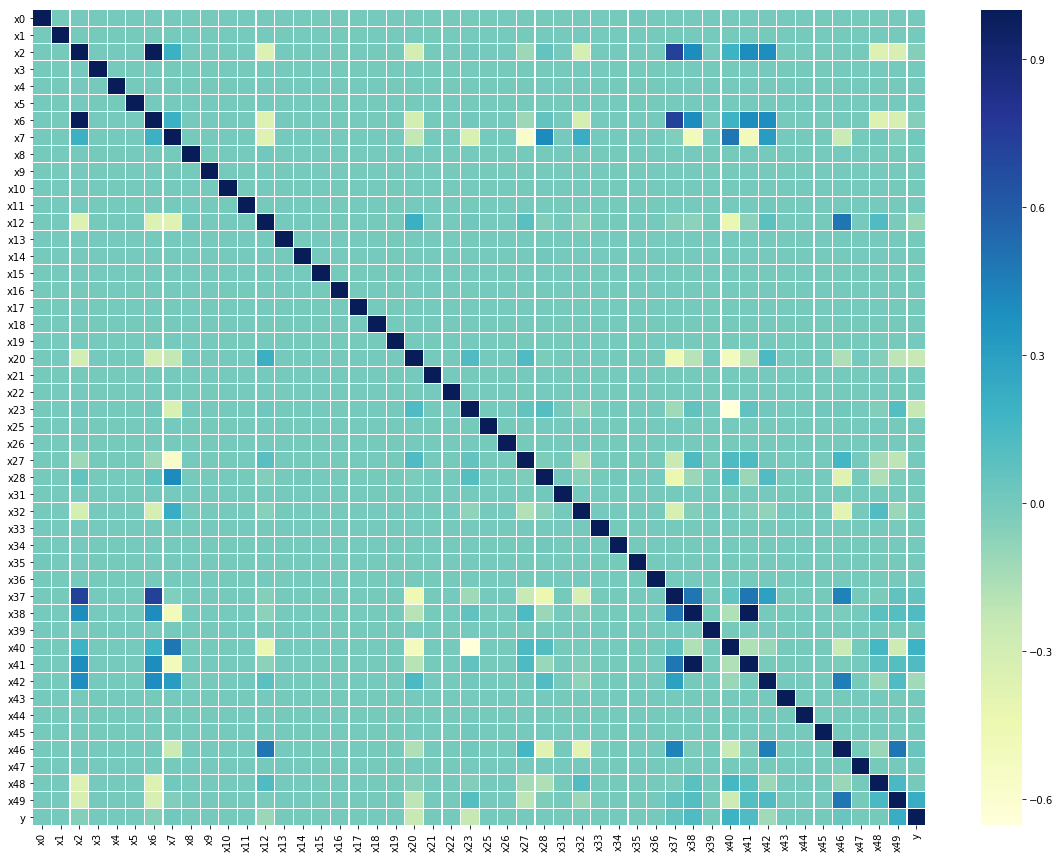

In [27]:
corrmat = drop_nan_df.corr() 
  
f, ax = plt.subplots(figsize =(20, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

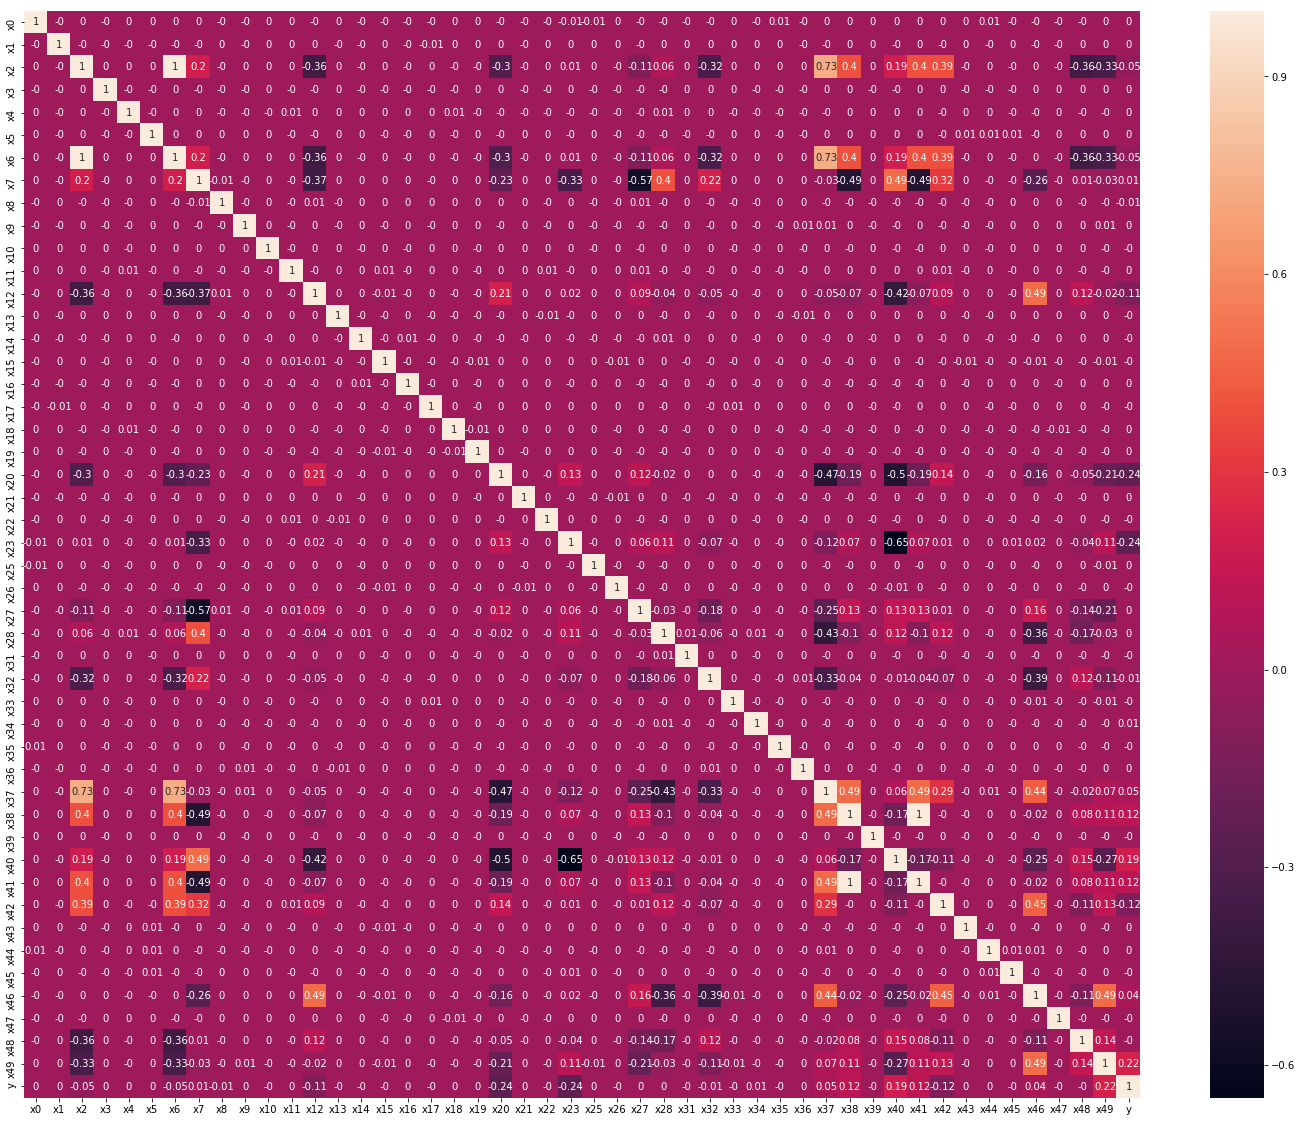

In [28]:
correlation_matrix = drop_nan_df.corr().round(2)
plt.figure(figsize = (25,20))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Pandas Profile (mini)

In [26]:
from pandas_profiling import ProfileReport

In [ ]:
#profFull = ProfileReport(df)
#profFull.to_file(output_file='output.html')

In [31]:
profileMin = ProfileReport(drop_nan_df, minimal=True)
profileMin.to_file(output_file="output_min.html")

In [ ]:
#prof1000 = ProfileReport(df.sample(n=1000)) 
#prof1000.to_file(output_file='output.html')
#vars = {'cat': {'check_composition' : False}}

In [33]:
# how to make pair plots....or is dataset too large

## One Hot Encode of Day, Month, Country

In [30]:
onehot1 = pd.get_dummies(drop_nan_df.x24, prefix='Country')
onehot1.head()

,Country_America,Country_Asia,Country_Europe
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [31]:
dataMergeoh1 = pd.concat([drop_nan_df, onehot1], axis=1)
dataMergeoh1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,y,Country_America,Country_Asia,Country_Europe
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,0,1
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,0,1,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,0,1,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,0,1,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,0,1,0


In [32]:
onehot2 = pd.get_dummies(dataMergeoh1.x29, prefix='Month')
onehot2.head()

,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [33]:
dataMergeoh2 = pd.concat([dataMergeoh1, onehot2], axis=1)
dataMergeoh2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,1,0,0,0,0,0,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,1,0,0,0,0,0,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,1,0,0,0,0,0,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,1,0,0,0,0,0,0


In [34]:
onehot3 = pd.get_dummies(dataMergeoh2.x30, prefix='Day')
onehot3.head()

,Day_fri,Day_mon,Day_thurday,Day_tue,Day_wed
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0


In [35]:
clean_data = pd.concat([dataMergeoh2, onehot3], axis=1)
clean_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,Day_fri,Day_mon,Day_thurday,Day_tue,Day_wed
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [36]:
clean_data = clean_data.drop(['x24', 'x29', 'x30'], axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 68 columns):
x0                 158392 non-null float64
x1                 158392 non-null float64
x2                 158392 non-null float64
x3                 158392 non-null float64
x4                 158392 non-null float64
x5                 158392 non-null float64
x6                 158392 non-null float64
x7                 158392 non-null float64
x8                 158392 non-null float64
x9                 158392 non-null float64
x10                158392 non-null float64
x11                158392 non-null float64
x12                158392 non-null float64
x13                158392 non-null float64
x14                158392 non-null float64
x15                158392 non-null float64
x16                158392 non-null float64
x17                158392 non-null float64
x18                158392 non-null float64
x19                158392 non-null float64
x20                158392 non

In [37]:
clean_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,Day_fri,Day_mon,Day_thurday,Day_tue,Day_wed
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,0.007709,0.137052,0.002090,0.015058,0.067806,0.003510,0.003056,0.184125,0.174819,0.634489
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,0.087461,0.343904,0.045666,0.121782,0.251414,0.059144,0.055194,0.387588,0.379814,0.481575
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling Analysis

## Random Forest

In [38]:
print("The shape of our data is:", clean_data.shape)

The shape of our data is: (158392, 68)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
X = clean_data.drop('y', axis=1)
y = clean_data['y']

We think that it is appropriate to transformour data, so we should get minimal outlier skew, and we will have an aggredate score of accuracy, precision and recall based on different groupings of the data.

In [45]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=83)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X_train_scl = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scl = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [46]:
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_scl,y_train)

# predictions
rfc_predict = rfc.predict(X_test_scl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[18079   875]
 [ 2448 10277]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     18954
           1       0.92      0.81      0.86     12725

   micro avg       0.90      0.90      0.90     31679
   macro avg       0.90      0.88      0.89     31679
weighted avg       0.90      0.90      0.89     31679





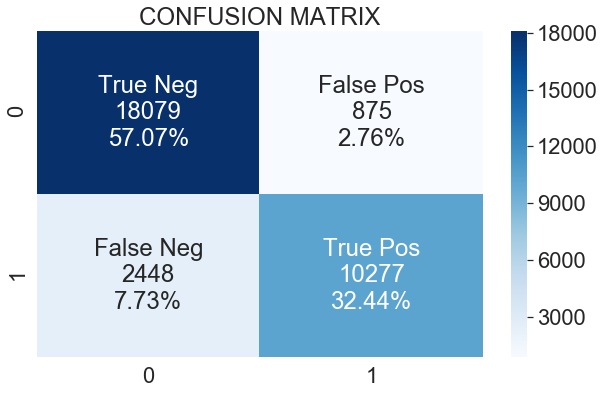

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

conf = confusion_matrix(y_test, rfc_predict)

plt.figure(figsize=(10, 6))
sns.set(font_scale=2)
plt.title('CONFUSION MATRIX')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')

In [49]:
rfc_cv_score = cross_val_score(rfc, X, y, cv = 3, scoring='roc_auc')

In [50]:
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== All AUC Scores ===
[0.9510841  0.95566385 0.94922568]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9519912103614865


In [62]:
ylist = y_test.values.astype('int64')
ylist
ybinary = label_binarize(ylist, classes=[0, 1])
y_score = label_binarize(rfc_predict, classes=[0, 1])

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes = 1
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

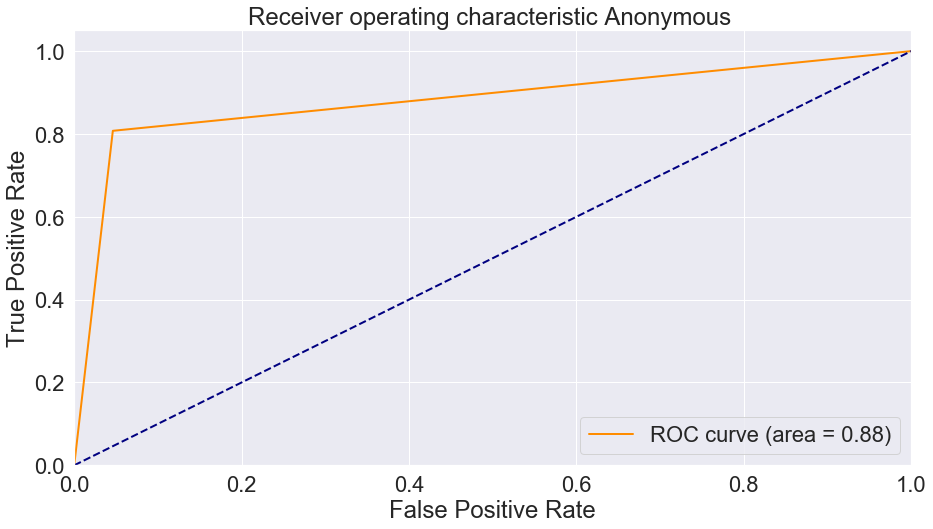

In [65]:
plt.figure(figsize=(15,8))

lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Anonymous ')
plt.legend(loc="lower right")
plt.show()

## Feature Importance

In [69]:
# Merge field names and feature importance to display them together
fi = pd.DataFrame(rfc.feature_importances_, columns =['featimp'])
featuresnames = pd.DataFrame(X_test.columns.values.tolist(), columns =['fields'])

featimpdf = pd.merge(featuresnames, fi, left_index=True, right_index=True)
featimpdf = featimpdf.sort_values(by='featimp', ascending=False)
featimpdf

,fields,featimp
23,x23,0.069659
20,x20,0.064826
45,x48,0.059799
46,x49,0.056732
39,x42,0.053704
26,x27,0.048024
12,x12,0.047058
34,x37,0.044500
27,x28,0.043763
37,x40,0.041991


[Text(0, 0, 'x23'),
 Text(0, 0, 'x20'),
 Text(0, 0, 'x48'),
 Text(0, 0, 'x49'),
 Text(0, 0, 'x42'),
 Text(0, 0, 'x27'),
 Text(0, 0, 'x12'),
 Text(0, 0, 'x37'),
 Text(0, 0, 'x28'),
 Text(0, 0, 'x40'),
 Text(0, 0, 'x46'),
 Text(0, 0, 'x7'),
 Text(0, 0, 'x6'),
 Text(0, 0, 'x38'),
 Text(0, 0, 'x41'),
 Text(0, 0, 'x32'),
 Text(0, 0, 'x2'),
 Text(0, 0, 'x5'),
 Text(0, 0, 'x18'),
 Text(0, 0, 'x3'),
 Text(0, 0, 'x8'),
 Text(0, 0, 'x22'),
 Text(0, 0, 'x19'),
 Text(0, 0, 'x11'),
 Text(0, 0, 'x16'),
 Text(0, 0, 'x33'),
 Text(0, 0, 'x36'),
 Text(0, 0, 'x17'),
 Text(0, 0, 'x45'),
 Text(0, 0, 'x31'),
 Text(0, 0, 'x14'),
 Text(0, 0, 'x1'),
 Text(0, 0, 'x0'),
 Text(0, 0, 'x39'),
 Text(0, 0, 'x25'),
 Text(0, 0, 'x4'),
 Text(0, 0, 'x13'),
 Text(0, 0, 'x15'),
 Text(0, 0, 'x44'),
 Text(0, 0, 'x47'),
 Text(0, 0, 'x9'),
 Text(0, 0, 'x35'),
 Text(0, 0, 'x26'),
 Text(0, 0, 'x34'),
 Text(0, 0, 'x10'),
 Text(0, 0, 'x43'),
 Text(0, 0, 'x21'),
 Text(0, 0, 'Country_Europe'),
 Text(0, 0, 'Country_Asia'),
 Text(0, 0

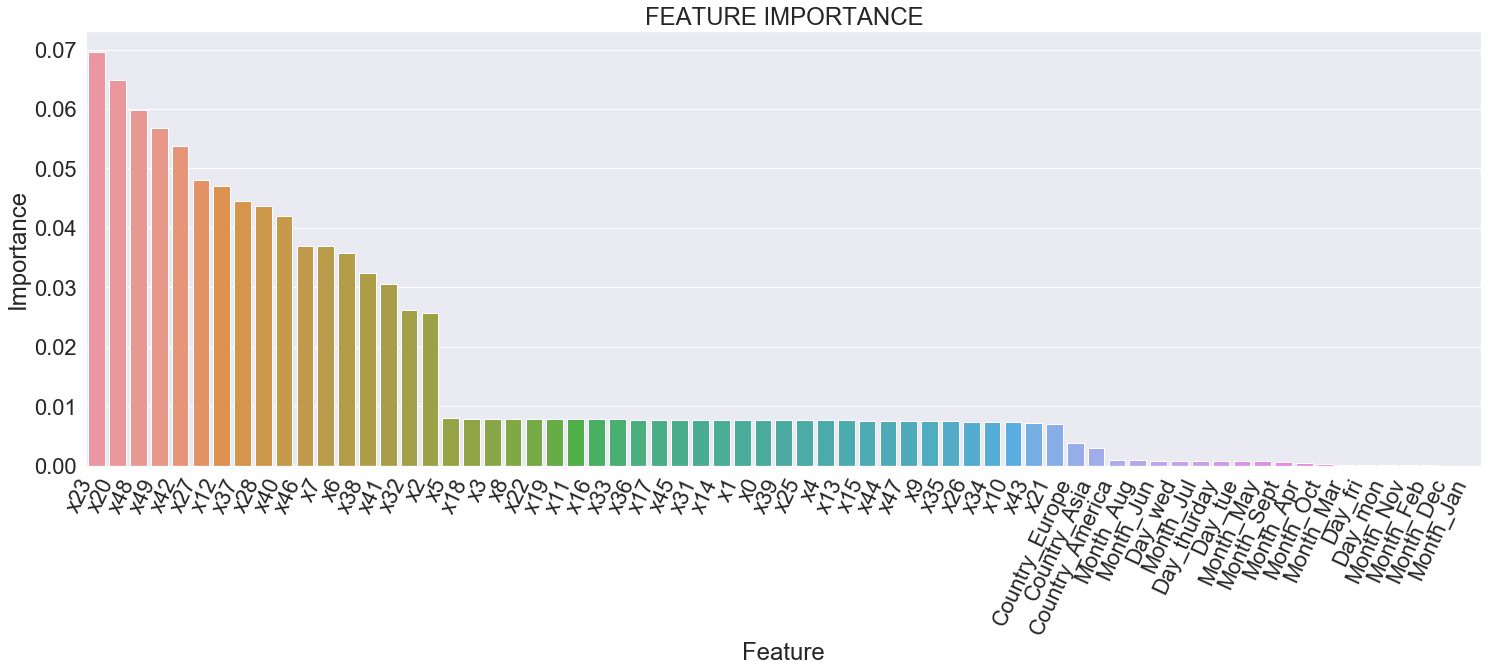

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
ax = sns.barplot(x=featimpdf.fields, y=featimpdf.featimp)
ax.set_title('FEATURE IMPORTANCE')
plt.xlabel("Feature")
plt.ylabel("Importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

# Conclusion 